1. Введение
Целью данной задачи является обучение двх моделей классификации текстов для определения тональности (**sentiment**) на основе предложений (**sentence**). Для решения будут использованы простые методы мащинного обучения: логистическую регрессию и наивный Байес. Каждый этап выполнения будет прокомментирован.  
Это второй проект из тестового задания, так как задания схожи, то будут предприняты те же самые шаги и на их основе сделан вывод о лучшей модели.

# 2. Импорт библиотек

In [5]:
# Библиотеки для работы с данными и визуализации
import pandas as pd  # Для работы с табличными данными
import numpy as np   # Для числовых операций
import matplotlib.pyplot as plt  # Для построения графиков
import seaborn as sns  # Для улучшенной визуализации

# Библиотеки для машинного обучения
from sklearn.model_selection import train_test_split  # Для разделения данных на тренировочную и тестовую выборки
from sklearn.feature_extraction.text import TfidfVectorizer  # Для векторизации текстовых данных через TF-IDF
from sklearn.linear_model import LogisticRegression  # Модель логистической регрессии
from sklearn.naive_bayes import MultinomialNB  # Модель наивного Байеса
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Для оценки качества модели

# Библиотеки для предобработки текста
import re  # Для работы с регулярными выражениями (удаление лишних символов)
import nltk  # Библиотека для обработки естественного языка
from nltk.corpus import stopwords  # Стоп-слова для удаления из текста
from nltk.stem import WordNetLemmatizer  # Лемматизатор для приведения слов к базовой форме

# 3. Загрузка и анализ данных

In [15]:
# Создание датасета из combined_emotions
df = pd.read_csv("C:\\archive\\combined_sentiment_data.csv")
print('Первые 5 строк датасета:')
df.head(5)

Первые 5 строк датасета:


,sentence,sentiment
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
3,Tied to charger for conversations lasting more...,negative
4,The mic is great.,positive


In [17]:
# Проверка размера датасета и распределения классов
print(f'Размер датасета: {len(df)}')
print('Распределение классов:')
df['sentiment'].value_counts()

Размер датасета: 3309
Распределение классов:


sentiment
positive    1679
negative    1630
Name: count, dtype: int64

In [73]:
# Проверка на наличие пропущенных значений 
print('Количество пропущенных значений:')
df.isnull().sum()

Количество пропущенных значений:


sentence          0
sentiment         0
clean_sentence    0
dtype: int64

**Комментарий**:  
На этом этапе мы проверили:
- Размер датасета
- Распределение классов (чтобы убедиться, что данные не сбалансированы, в данном случае данные примерно сбалансированы)
- Наличие пропущенных значений (пропущенных значений не обнаружилось)

# 4. Предобработка текста

In [25]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\D1S3CT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\D1S3CT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
# Инизиализация лемматизаторов и списка стоп-слов 
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [33]:
def preprocess_text(text):
    # Приведение в нижний регистр
    text = text.lower()
    # Удаление пунктуации и специальных символов при помощи регулярных выражений
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    #Разбиваем текст на отдельные слова при помощи метода split
    words = text.split()
    # Удаляем стоп-слова и лемматизируем используя списочное включение
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Объединяем слова обратно при помощи join
    return ' '.join(words)

In [47]:
# Применяем созданную функцию (предобработку) к данным,
df['clean_sentence'] = df['sentence'].apply(preprocess_text)
print('Пример обработанного текста:')
df[['sentence', 'clean_sentence']].head()

Пример обработанного текста:


,sentence,clean_sentence
0,So there is no way for me to plug it in here i...,way plug u unless go converter
1,"Good case, Excellent value.",good case excellent value
2,Great for the jawbone.,great jawbone
3,Tied to charger for conversations lasting more...,tied charger conversation lasting minutesmajor...
4,The mic is great.,mic great


**Комментарий**:
- Преобразовали текст в нижний регистр
- Удалили лишние символы (в частности ненужную пунктуацию)
- Удалили стоп-слова (например 'i', 'am', 'and')
- Лемматизировали слова для уменьшения размерности признакового пространства (приведение слов к базовой форме)

# 5. Векторизация текста

In [39]:
# Инициализация TF-IDF векторизатора
vectorizer = TfidfVectorizer(max_features=5000) # Ограничиваем количество признаков
X = vectorizer.fit_transform(df['clean_sentence'])
y = df['sentiment']

In [41]:
# Разделение на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Комментарий**  
Мы преобразовали тестовые данные в числовые признаки с помощью метода TF-IDF. Это позволяет использовать текстовые данные в алгоритмах МО

# 6. Обучение первой модели

In [45]:
# Обучение модели логистической регрессии
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
# Предсказание и оценка качества
y_pred1 = model1.predict(X_test)
print('Логистическая регрессия:')
print(classification_report(y_test, y_pred1))
print(f'Accuracy: {accuracy_score(y_test, y_pred1): .2f}')

Логистическая регрессия:
              precision    recall  f1-score   support

    negative       0.82      0.82      0.82       334
    positive       0.82      0.81      0.82       328

    accuracy                           0.82       662
   macro avg       0.82      0.82      0.82       662
weighted avg       0.82      0.82      0.82       662

Accuracy:  0.82


**Комментарий**
- Общая точность модели составила 0.82, что является хорошим результатом учитывая сложность данных
- Модель хорошо сбалансированна, так как Полнота, Точность и F1-score находятся на одном уровне (0.82-0.81)

# 7. Обучение второй модели (Наивный Байес)

In [54]:
# Обучение модели наивного Байеса
model2 = MultinomialNB()
model2.fit(X_train, y_train)

MultinomialNB()

In [56]:
# Предсказание и оценка качества
y_pred2 = model2.predict(X_test)
print('Наивный Байес:')
print(classification_report(y_test, y_pred2))
print(f'Accuracy: {accuracy_score(y_test, y_pred2): .2f}')

Наивный Байес:
              precision    recall  f1-score   support

    negative       0.83      0.76      0.79       334
    positive       0.78      0.84      0.81       328

    accuracy                           0.80       662
   macro avg       0.80      0.80      0.80       662
weighted avg       0.80      0.80      0.80       662

Accuracy:  0.80


**Комментарий**:
- Модель правильно классифицирует 80% примеров, что немного ниже, чем у логистической регрессии (0.82)
- Модель более точна при предсказании negative 0.83, по сравнение с positive 0.78
- Модель чаще всего находит примеры класса positive 0.84, чем negative 0.76
- Исходя из f1-score можно понять, что по итогу модель лучше работает с positive 0.81, чем с negative 0.79 

# 8. Анализ результатов

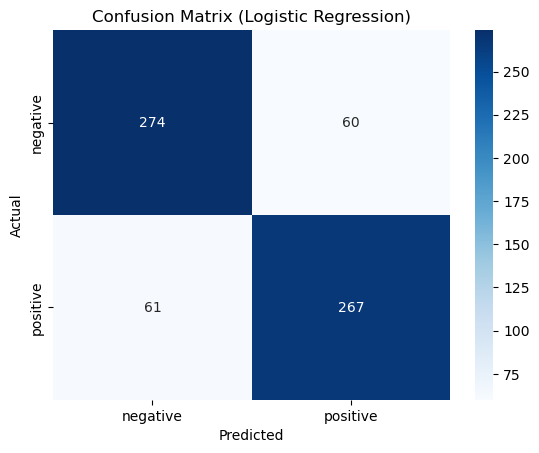

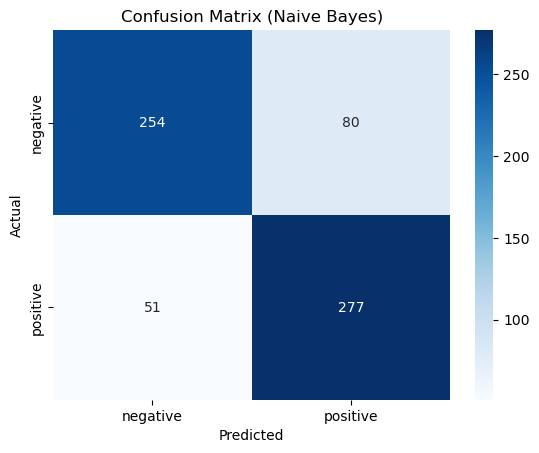

In [63]:
# Визаулизация матрицы путаницы для обеих моделей
def plot_confusion_matrix(y_true, y_pred, title, labels):
    # Создание матрицы путаницы
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    # Построение heatmap с названиями классов
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

    # Настройка заголовка осей
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Список названий классов
class_labels = ['negative', 'positive']

# Построение матрицы путаницы
plot_confusion_matrix(y_test, y_pred1, 'Confusion Matrix (Logistic Regression)', class_labels)
plot_confusion_matrix(y_test, y_pred2, 'Confusion Matrix (Naive Bayes)', class_labels)

**Комментарий**: 
Данная матрица позволяет понять какие классы модель чаще путает и где она наиболее точна (может потребоваться для дальнейшей доработки модели)

# 9. Выводы

In [69]:
#Сравнение результатов
print('Сравнение результатов двух моделей:')
print(f'Accuracy (Logistic Regression): {accuracy_score(y_test, y_pred1):.2f}')
print(f'Accuracy (Naive Bayes): {accuracy_score(y_test, y_pred2):.2f}')

Сравнение результатов двух моделей:
Accuracy (Logistic Regression): 0.82
Accuracy (Naive Bayes): 0.80


In [71]:
# Финальные вывводы
if accuracy_score(y_test, y_pred1) > accuracy_score(y_test, y_pred2):
    print('Логистическая регрессия показала лучший результат')
else:
    print('Наивный Байес показал лучший результат')

Логистическая регрессия показала лучший результат


# Итог
#### Общая точность (Accuracy):
- Логистическая регрессия достигла общей точности = 0.82, в то время как Наивный Байес показал общую точность = 0.80.
- Это говорит о том, что логистическая регрессия более точно классифицирует примеры во всём датасете.
#### Сбалансированность метрик:
- Логистическая регрессия демонстрировала более сбалансированные значения точности, полноты и f1-score для обоих классов (positive и negative).
- Например:
Для класса negative: логистическая регрессия показала полноту = 0.82 против 0.76 у Наивного Байеса.
Для класса positive: логистическая регрессия показала точность = 0.82 против 0.78 у Наивного Байеса.
#### Учёт зависимостей между признаками:
- Логистическая регрессия не делает предположения о независимости признаков, в отличие от Наивного Байеса.
- В текстовых данных слова часто зависят друг от друга, особенно в отзывах, где контекст играет важную роль. Это позволяет логистической регрессии лучше моделировать взаимосвязи между словами.
#### Работа с балансом классов:
- Датасет практически сбалансирован (334 примера для negative и 328 для positive), что снижает влияние дисбаланса.
- Несмотря на это, логистическая регрессия показала более стабильные результаты для обоих классов, особенно в терминах полноты.
#### Стабильность моделей:
- Метрики логистической регрессии (точность, полнота, f1-score) были более стабильными для обоих классов, тогда как Наивный Байес показал заметные различия:
    - Высокую точность (precision = 0.83) для класса negative, но низкую полноту (recall = 0.76).
    - Хорошую полноту (recall = 0.84) для класса positive, но низкую точность (precision = 0.78).